In [208]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes,load_breast_cancer
pd.set_option('display.max_columns',200)
import seaborn as sns
%matplotlib inline

In [209]:
dat = load_breast_cancer()
df = pd.DataFrame(dat.data,columns=dat.feature_names)
df.head()

In [212]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score

In [213]:
df['target'] = dat.target

In [214]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [215]:
df.target.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

In [216]:
var = [x for x in df.columns if x!='target']

X = df[var[:2]].copy()
y = df['target']

Xt, Xv, yt, yv = train_test_split(X,y,train_size=0.7)

Xt.shape,Xv.shape,yt.shape,yv.shape

modelo = LogisticRegression()

modelo.fit(Xt,yt)

print (roc_auc_score(y_true=yt,y_score=modelo.predict_proba(Xt)[:,1]))
print (roc_auc_score(y_true=yv,y_score=modelo.predict_proba(Xv)[:,1]))

print (accuracy_score(y_true=yt,y_pred=modelo.predict(Xt)))
print (accuracy_score(y_true=yv,y_pred=modelo.predict(Xv)))

0.9404761904761905
0.9424242424242424
0.8844221105527639
0.8947368421052632


/home/jose/Documentos/unam/repos/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/jose/Documentos/unam/repos/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [217]:
for c in var:
    df['d_%s'%c] = pd.cut(df[c],bins=2,include_lowest=True).astype(str)

In [218]:
vard = [x for x in df.columns if x[:2]=='d_']

In [219]:
for i,v in enumerate(vard):
    if i<=1:
        aux = df[[v,'target']].copy()
        aux['n'] =1
        aux = aux.pivot_table(aggfunc='count',index=v,columns='target')
        aux.columns=aux.columns.droplevel()
        aux.reset_index(inplace=True)
        aux['PNE'],aux['PE'] = aux[0]/aux[0].sum(),aux[1]/aux[1].sum()
        aux['w_%s'%v[2:]] = np.log(aux['PNE']/aux['PE'])
        aux = aux[['%s'%v,'w_%s'%v[2:]]]
        df = df.merge(aux,on=v,how='inner')

In [220]:
var = [x for x in df.columns if x[:2]=='w_']

X = df[var].copy()
y = df['target']

Xt, Xv, yt, yv = train_test_split(X,y,train_size=0.7)

Xt.shape,Xv.shape,yt.shape,yv.shape

modelo = LogisticRegression()

modelo.fit(Xt,yt)

print (roc_auc_score(y_true=yt,y_score=modelo.predict_proba(Xt)[:,1]))
print (roc_auc_score(y_true=yv,y_score=modelo.predict_proba(Xv)[:,1]))

print (accuracy_score(y_true=yt,y_pred=modelo.predict(Xt)))
print (accuracy_score(y_true=yv,y_pred=modelo.predict(Xv)))

0.754425706854602
0.7606944444444445
0.8266331658291457
0.7485380116959064


/home/jose/Documentos/unam/repos/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/jose/Documentos/unam/repos/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


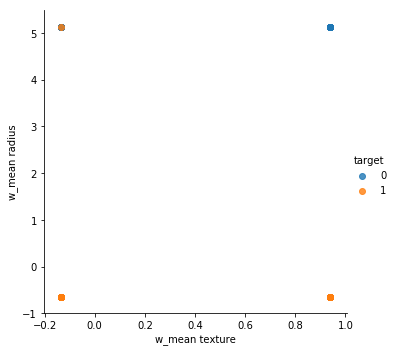

In [221]:
sns.lmplot(data=df,x=var[-1],y=var[-2],hue='target',fit_reg=False)